In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data = load_breast_cancer()
input = pd.DataFrame(data.data, columns = data.feature_names)
input = input.iloc[:,:5]
target = data.target

# input = pd.read_csv('', encoding='CP949')
# target = pd.read_csv('', encoding='CP949)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(input, target, random_state=42, test_size=0.2)

standard = StandardScaler()
x_train = standard.fit_transform(x_train)
x_test = standard.fit_transform(x_test)

In [54]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

test_prediction = rf.predict(x_test)
test_accuracy = accuracy_score(test_prediction, y_test)
test_precision = precision_score(test_prediction, y_test)
test_recall = recall_score(test_prediction, y_test)
roc_auc = roc_auc_score(test_prediction, y_test)
f1 = f1_score(test_prediction, y_test)
print(f'model : RandomForest\naccuracy : {test_accuracy}\nprecision_score : {test_precision}\nrecall_score : {test_recall}\nroc_score : {roc_auc}\nf1_score : {f1}')

model : RandomForest
accuracy : 0.9473684210526315
precision_score : 0.9577464788732394
recall_score : 0.9577464788732394
roc_score : 0.9439895185063871
f1_score : 0.9577464788732394


In [52]:
print(classification_report(y_test, test_prediction, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.93      0.93      0.93        43
     class 1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



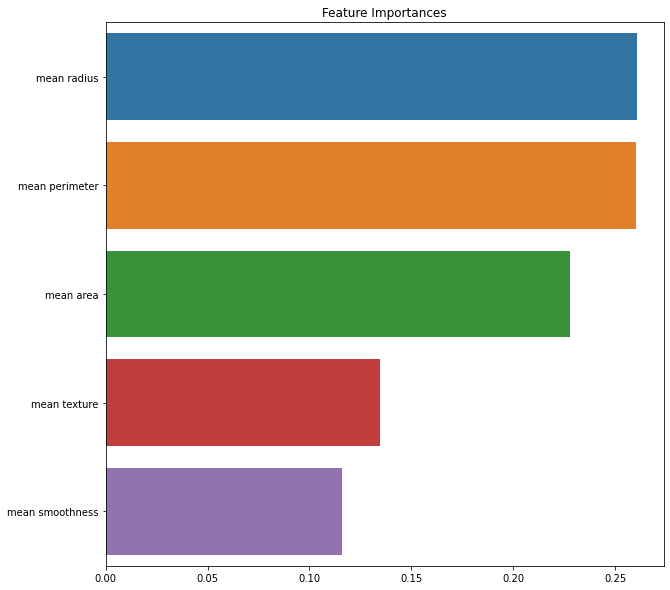

In [49]:
importances = pd.Series(rf.feature_importances_, index=input.columns)
importances = importances.sort_values(ascending=False)

x = importances.values
y = np.arange(len(importances))

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
sns.barplot(x=importances, y=importances.index)



plt.show()